In [25]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt


In [26]:
# Reading files
df = pd.read_csv('netflix_titles.csv')

# Dropping nulls
df = df.dropna(subset =['type','rating','duration','country','release_year'])


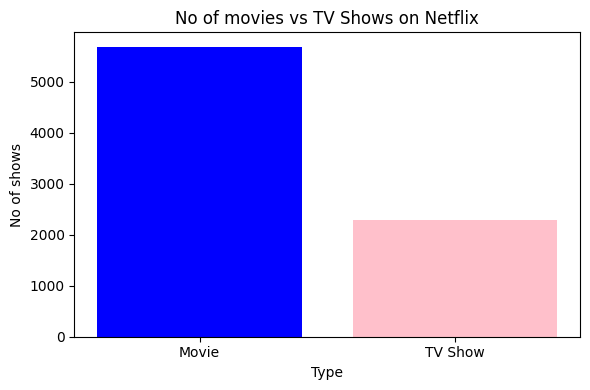

In [27]:
# Number of Movies vs TV shows 
type_counts = df['type'].value_counts()
plt.figure(figsize= (6,4))
plt.bar(type_counts.index,type_counts.values,color=['blue','pink'])
plt.title('No of movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('No of shows')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()



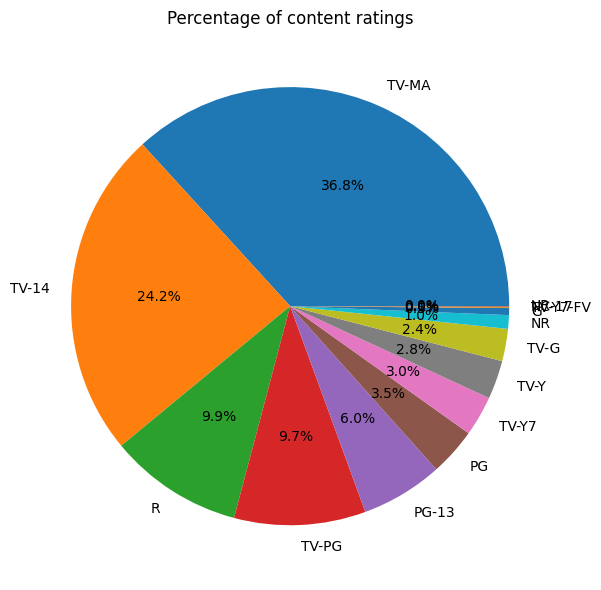

In [28]:
# Percentage of content ratings

ratings_count = df['rating'].value_counts()
plt.figure(figsize =(8,6))
plt.pie(ratings_count.values,labels=ratings_count.index,autopct='%1.1f%%')
plt.title('Percentage of content ratings')
plt.tight_layout()
plt.savefig('content_ratings_pie.png')
plt.show()



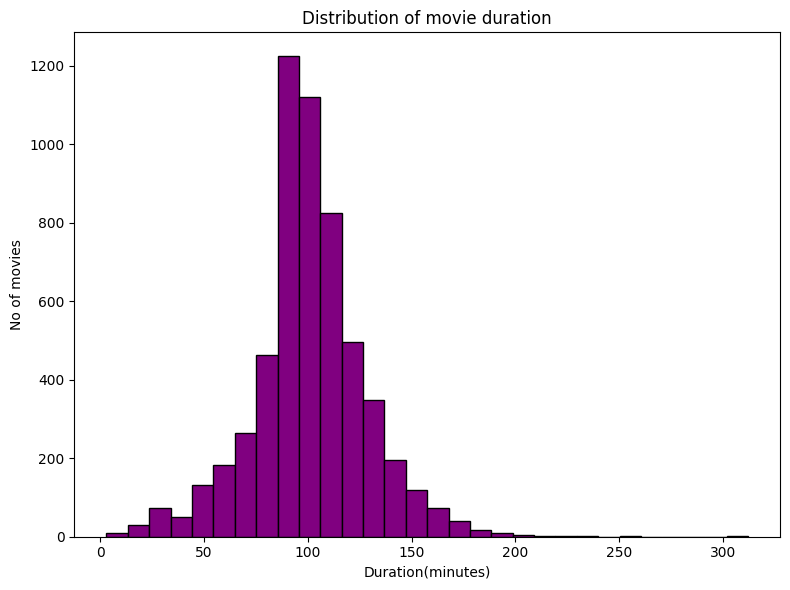

In [29]:
# Distribution of movie duration

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize = (8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of movie duration')
plt.xlabel('Duration(minutes)')
plt.ylabel('No of movies')
plt.tight_layout()
plt.savefig('movie_duration_hist.png')
plt.show()



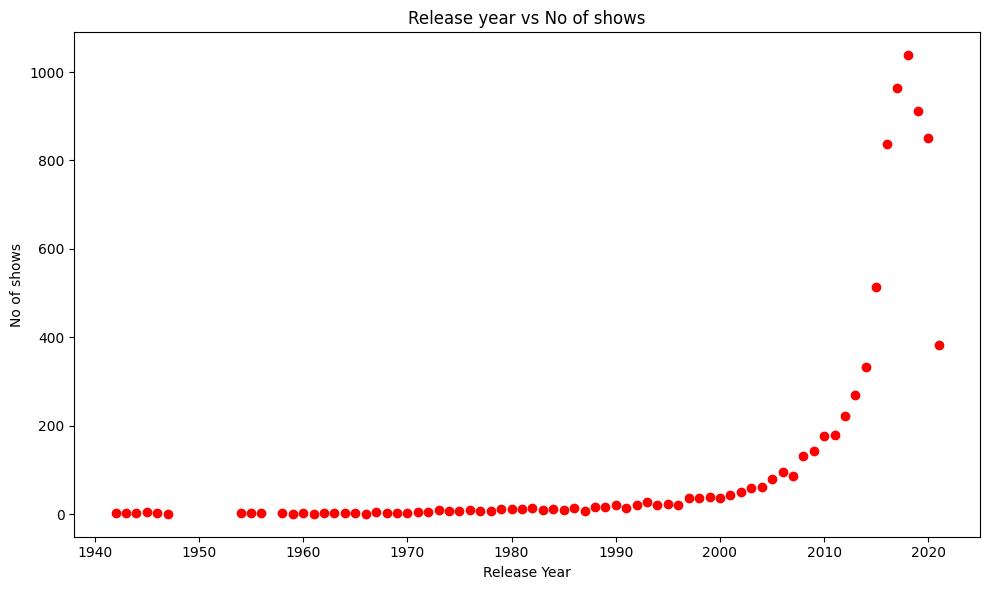

In [30]:
# Release year vs No of shows

release_counts = df['release_year'].value_counts()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.title('Release year vs No of shows')
plt.xlabel('Release Year')
plt.ylabel('No of shows')
plt.tight_layout()
plt.savefig('Release_year_scatter.png')
plt.show()



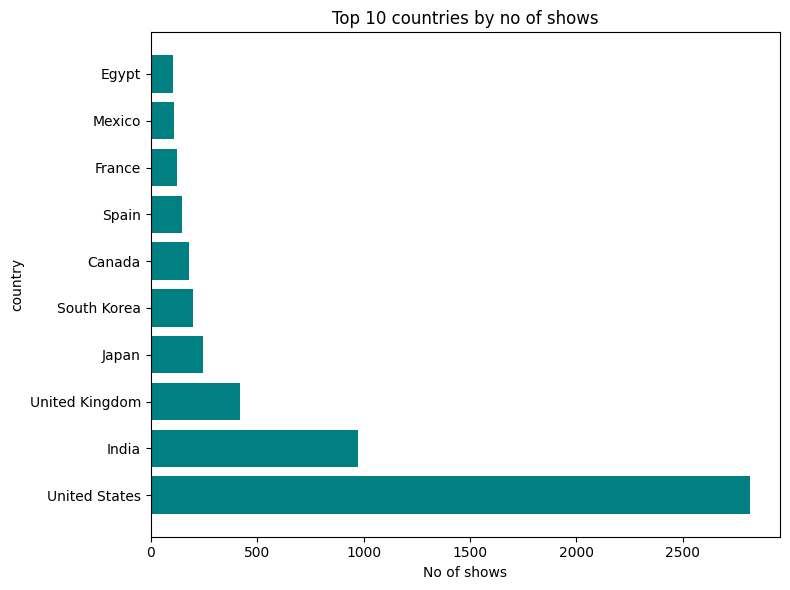

In [31]:
# Top 10 countries by no of shows

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('Top 10 countries by no of shows')
plt.xlabel('No of shows')
plt.ylabel('country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()



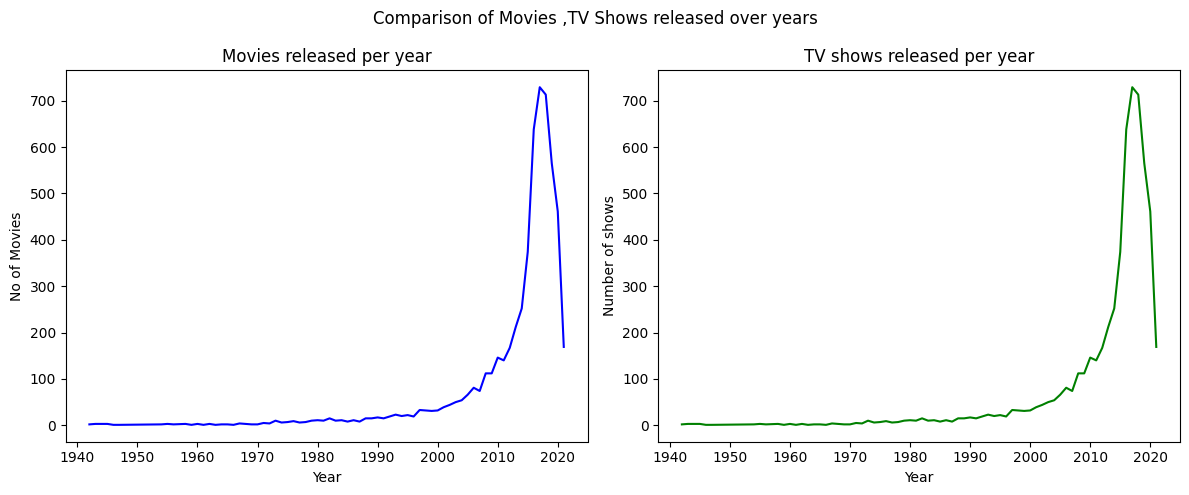

In [32]:
# Subplots

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2,figsize =(12,5))

ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies released per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('No of Movies')

ax[1].plot(content_by_year.index,content_by_year['Movie'],color='green')
ax[1].set_title('TV shows released per year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of shows')

fig.suptitle('Comparison of Movies ,TV Shows released over years')
plt.tight_layout()
plt.savefig('movies_tvshows_comparison.png')
plt.show()
